# Ch8

In [1]:
import random

import gnwrapper
import gym
import matplotlib.pyplot as plt
import numpy as np
from icecream import ic
from tqdm.notebook import tqdm

import ch8

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


## 8.1

In [2]:
# .1
env = gym.make("CartPole-v1")

In [3]:
state = env.reset(seed=0)
ic(state)
_ = ic(env.action_space)

ic| state: array([ 0.01369617, -0.02302133, -0.04590265, -0.04834723], dtype=float32)
ic| env.action_space: Discrete(2)


In [4]:
action = 0
next_state, reward, done, info = env.step(action)
_ = ic(next_state)

ic| next_state: array([ 0.01323574, -0.21745604, -0.04686959,  0.22950698], dtype=float32)


In [5]:
# .2
env = gnwrapper.LoopAnimation(gym.make("CartPole-v1"))
state = env.reset(seed=0)
rng = np.random.default_rng(seed=0)
done = False

while not done:
    env.render()
    action = rng.choice([0, 1])
    next_state, reward, done, info = env.step(action)

env.close()
env.display()
plt.close()

## 8.2

In [6]:
# .2
env = gym.make("CartPole-v1")
replay_buffer = ch8.ReplayBuffer(buffer_size=10_000, batch_size=32)

for episode in range(10):
    state = env.reset()
    done = False

    while not done:
        action = 0
        next_state, reward, done, info = env.step(action)
        replay_buffer.add(state, action, reward, next_state, done)
        state = next_state

batch = replay_buffer.get_batch()
ic(batch.state.shape)
ic(batch.action.shape)
ic(batch.reward.shape)
ic(batch.next_state.shape)
_ = ic(batch.done.shape)

ic| batch.state.shape: torch.Size([32, 4])
ic| batch.action.shape: torch.Size([32])
ic| batch.reward.shape: torch.Size([32])
ic| batch.next_state.shape: torch.Size([32, 4])
ic| batch.done.shape: torch.Size([32])


In [7]:
# .5

episodes = 300
sync_interval = 20
seed_numpy = 0
random.seed(0)

env = gym.make("CartPole-v1")
agent = ch8.DQNAgent(seed=seed_numpy)
reward_history = []

for i_episode in tqdm(range(episodes)):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)

        agent.update(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    if i_episode % sync_interval == 0:
        agent.sync_qnet()
        ic(i_episode)
        ic(total_reward)

    reward_history.append(total_reward)

  0%|          | 0/300 [00:00<?, ?it/s]

ic| i_episode: 0
ic| total_reward: 12.0
ic| i_episode: 20
ic| total_reward: 11.0
ic| i_episode: 40
ic| total_reward: 10.0
ic| i_episode: 60
ic| total_reward: 9.0
ic| i_episode: 80
ic| total_reward: 12.0
ic| i_episode: 100
ic| total_reward: 45.0
ic| i_episode: 120
ic| total_reward: 175.0
ic| i_episode: 140
ic| total_reward: 245.0
ic| i_episode: 160
ic| total_reward: 175.0
ic| i_episode: 180
ic| total_reward: 125.0
ic| i_episode: 200
ic| total_reward: 92.0
ic| i_episode: 220
ic| total_reward: 97.0
ic| i_episode: 240
ic| total_reward: 85.0
ic| i_episode: 260
ic| total_reward: 185.0
ic| i_episode: 280
ic| total_reward: 77.0


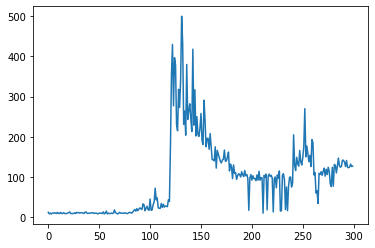

In [8]:
fig, ax = plt.subplots(1, 1)

ax.plot(range(episodes), reward_history)
plt.show()

In [9]:
# greedyな行動を観察する
env = gnwrapper.LoopAnimation(gym.make("CartPole-v1"))

agent.epsilon = 0
state = env.reset()
done = False
total_reward = 0

while not done:
    action = agent.get_action(state)
    next_state, reward, done, info = env.step(action)

    state = next_state
    total_reward += reward
    env.render()

ic(total_reward)


env.close()
env.display()
plt.close()

ic| total_reward: 121.0
